# EN3160 Assignment 1 
# Intensity Transformations and Neighborhood Filtering

# 1. Implement the intensity transformation

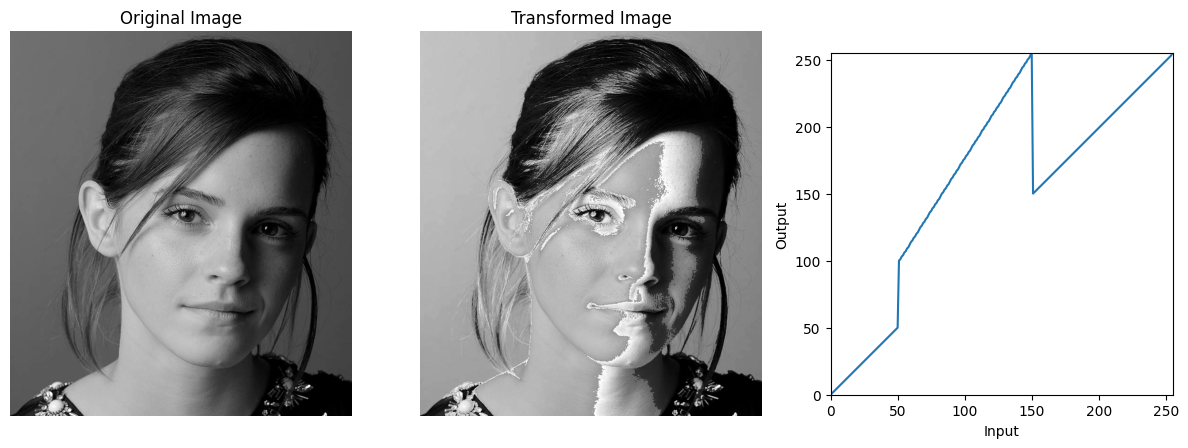

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the intensity ranges
c = np.array([(50,50),(50,100),(150,255),(150,150)])

# Generate the transformation function
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')  
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')

# Concatenate the transformation arrays
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

# Read the original image
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Display original and transformed images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_orig, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(image_transformed, cmap='gray')
axs[1].set_title('Transformed Image')
axs[1].axis('off')

# Display transformation function
axs[2].plot(transform)
axs[2].set_xlabel('Input')
axs[2].set_ylabel('Output')
axs[2].set_xlim(0,255)
axs[2].set_ylim(0,255)
axs[2].set_aspect('equal') 
plt.show()



# 2. Apply point intensity operations to accentuate,


## (a) white matter

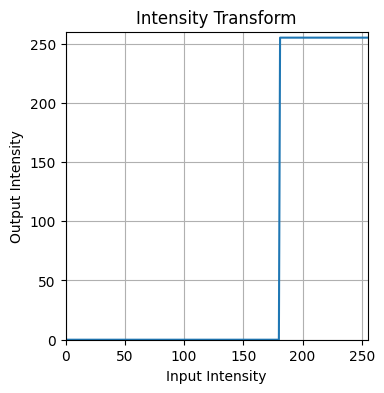

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds for white matter intensity enhancement
lower_thresh = 180  
upper_thresh = 255  

# Define intensity mapping points 
c = np.array([(0, lower_thresh), (lower_thresh, upper_thresh)])

# Generate the transformation
t1 = np.linspace(0, c[0,0], c[0,1] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1], 255, 255 - c[1,0]).astype('uint8')

# Concatenate the two transformation parts into a single transformation array
transform = np.concatenate((t1, t2), axis=0).astype('uint8')

# Ensure the transformation has exactly 256 values, covering all possible intensity values (0 to 255)
assert len(transform) == 256

# Plot the transformation function
fig, ax = plt.subplots()
fig.set_size_inches(4,4)  

# Plot the transformation function
ax.plot(transform)
ax.grid(True) 
ax.set_title('Intensity Transform')  
ax.set_xlabel('Input Intensity') 
ax.set_ylabel('Output Intensity')  
ax.set_xlim(0, 255)  
ax.set_ylim(0, 260)  
ax.set_aspect('equal')  

# Display the plot on the screen
plt.show()


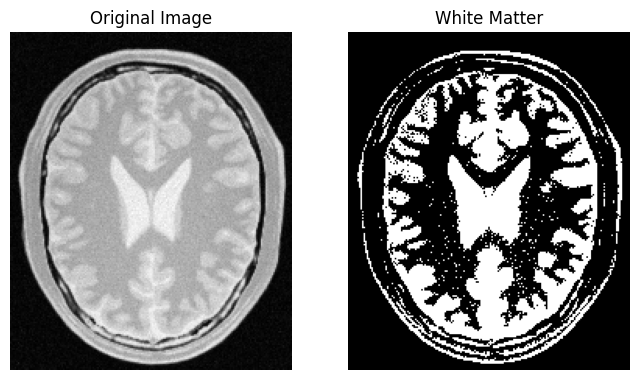

In [46]:
img_orig=cv.imread ('images/Brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img_orig is not None

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_orig, cmap='gray')  # Display grayscale image
ax[0].set_title('Original Image')
ax[0].axis('off')

image_transformed = cv.LUT(img_orig, transform)
ax[1].imshow(image_transformed, cmap='gray')  # Display grayscale transformed image
ax[1].set_title('White Matter')
ax[1].axis('off')

plt.show()

## (b) gray matter

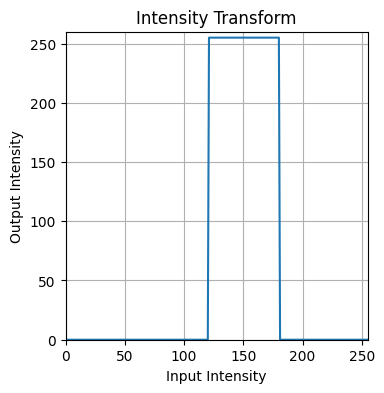

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds for gray matter intensity enhancement
lower_thresh = 120  
upper_thresh = 180  

# Define intensity mapping points 
c = np.array([(0,lower_thresh),(lower_thresh,255),(upper_thresh,255)])

# Generate the transformation
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
t2 = np.linspace(c[1,1],c[2,1],c[2,0] - c[1,0] ).astype('uint8')
t3 = np.linspace(0, 0, 255 - c[2,0]).astype('uint8')

# Concatenate the two transformation parts into a single transformation array
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

# Ensure the transformation has exactly 256 values, covering all possible intensity values (0 to 255)
assert len(transform) == 256

# Plot the transformation function
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)  

# Plot the transformation function
ax.plot(transform)
ax.grid(True) 
ax.set_title('Intensity Transform')  
ax.set_xlabel('Input Intensity') 
ax.set_ylabel('Output Intensity')  
ax.set_xlim(0, 255)  
ax.set_ylim(0, 260)  
ax.set_aspect('equal')  

# Display the plot on the screen
plt.show()


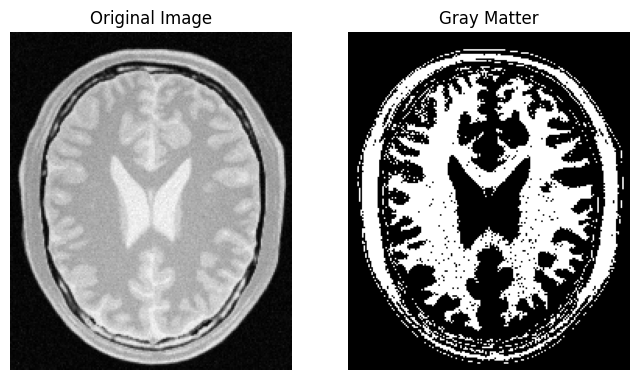

In [39]:
img_orig=cv.imread ('images/Brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img_orig is not None

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_orig, cmap='gray')  # Display grayscale image
ax[0].set_title('Original Image')
ax[0].axis('off')

image_transformed = cv.LUT(img_orig, transform)
ax[1].imshow(image_transformed, cmap='gray')  # Display grayscale transformed image
ax[1].set_title('Gray Matter')
ax[1].axis('off')

plt.show()

# 3. Gamma Correction

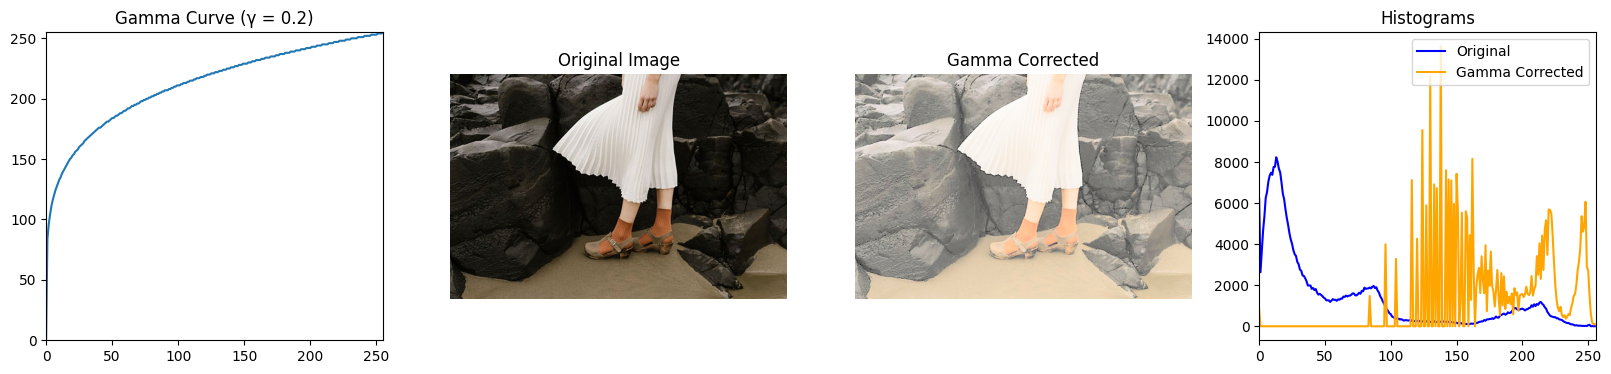

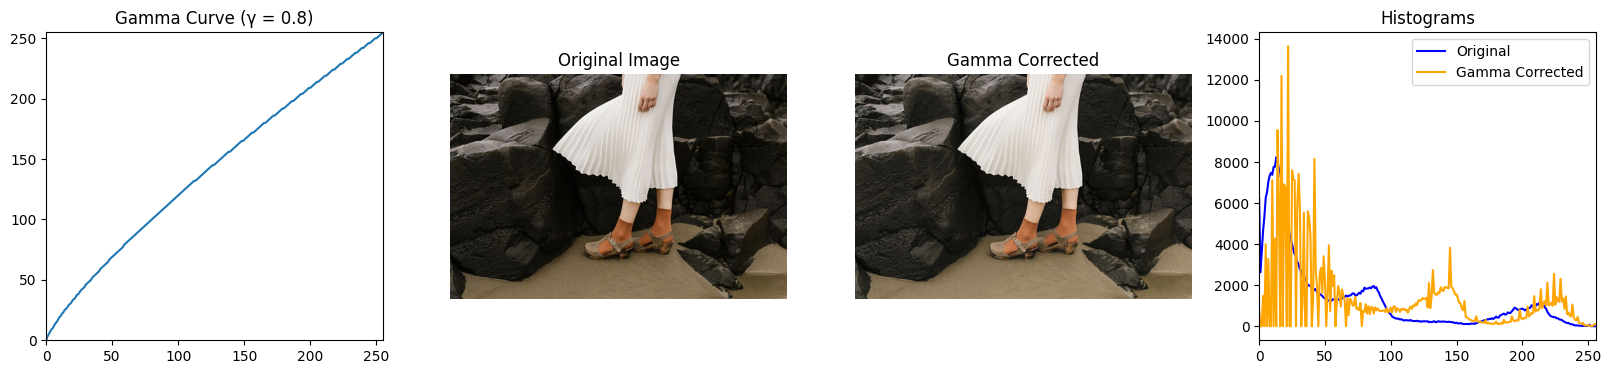

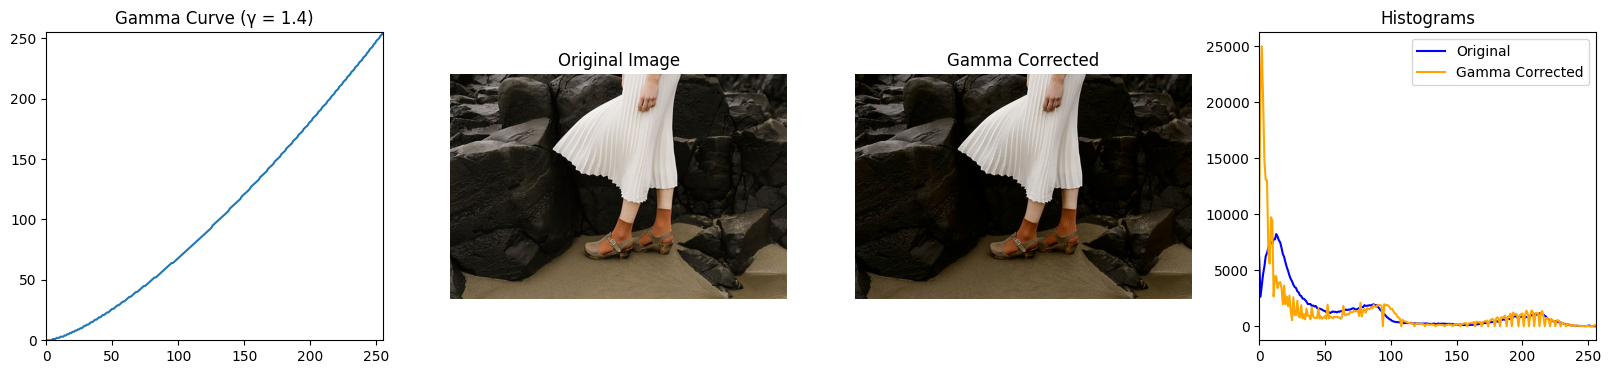

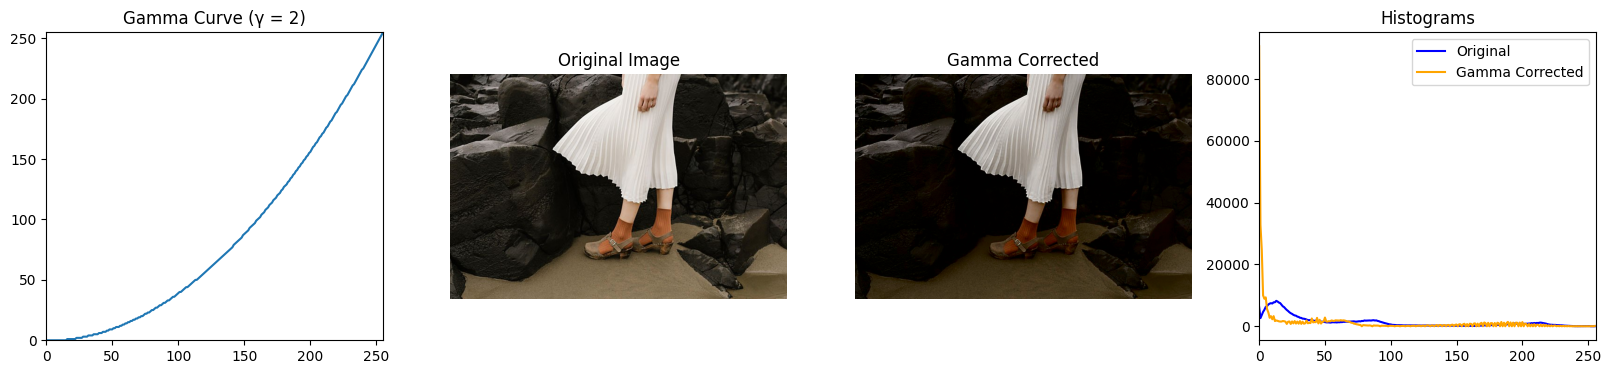

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("images/highlights_and_shadows.jpg")

# Convert the image from BGR to LAB color space and split into channels
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))

# Define gamma values for correction
gamma = [0.2, 0.8, 1.4, 2]

# Loop through each gamma value to apply gamma correction
for i in gamma:
    # Create a lookup table for gamma correction
    t = np.array([(p/255)**i * 255 for p in range(0, 256)]).astype(np.uint8)

    # Apply the gamma correction to the L channel
    g = cv.LUT(L, t)
    
    # Merge the corrected L channel with the original a and b channels
    corrected_img = cv.merge([g, a, b])

    # Calculate histograms for the original and corrected images
    hist1 = cv.calcHist([img], [0], None, [256], [0, 256])
    hist2 = cv.calcHist([corrected_img], [0], None, [256], [0, 256])

    # Create a figure for displaying the results in a single row
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))

    # Plot the gamma correction curve
    axs[0].plot(t)
    axs[0].set_title(f"Gamma Curve (γ = {i})")
    axs[0].set_xlim([0, 255])
    axs[0].set_ylim([0, 255])

    # Display the original image
    axs[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axs[1].set_title('Original Image')
    axs[1].axis('off')

    # Display the gamma-corrected image
    axs[2].imshow(cv.cvtColor(corrected_img, cv.COLOR_LAB2RGB))
    axs[2].set_title('Gamma Corrected')
    axs[2].axis('off')

    # Plot the histograms of original and corrected images
    axs[3].plot(hist1, color='blue', label='Original')
    axs[3].plot(hist2, color='orange', label='Gamma Corrected')
    axs[3].set_xlim([0, 256])
    axs[3].set_title('Histograms')
    axs[3].legend()

    # Display the combined plot
    plt.show()


# 4.Increasing the vibrance of a photograph

## Split the Image into Hue, Saturation, and Value Planes

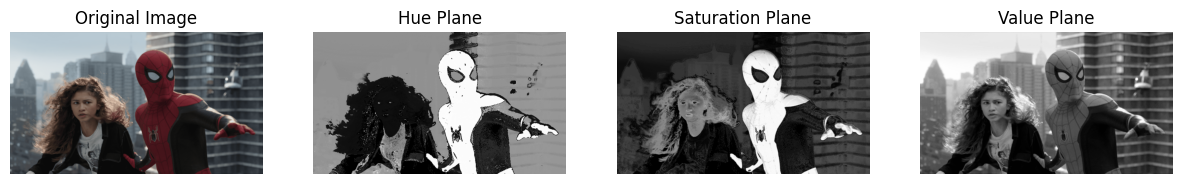

In [13]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/spider.png') 

# Convert the image from BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
h, s, v = cv2.split(hsv_image)

# Display the original image and the HSV planes
plt.figure(figsize=(15,5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(h, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(s, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(v, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.show()


## Apply the Intensity Transformation to the Saturation Plane

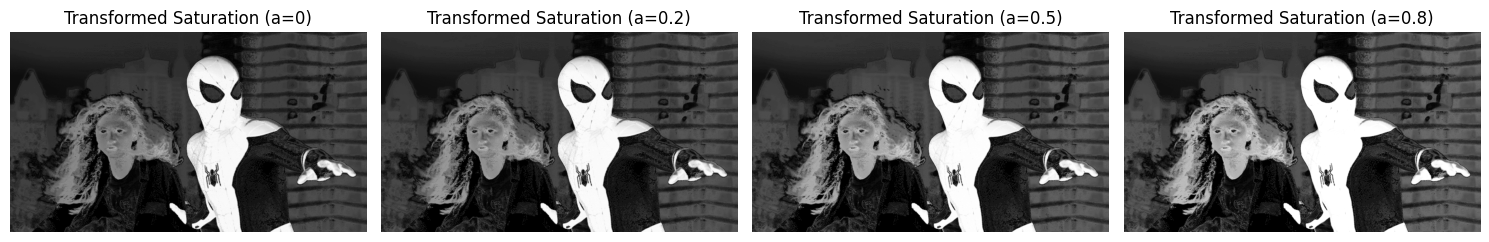

In [14]:
# Different values of 'a' for comparison
a_values = [0 , 0.2, 0.5, 0.8]  

# Create a figure with subplots arranged in one row
plt.figure(figsize=(15, 5))  # Adjust size for better clarity

for i, a in enumerate(a_values):
    transformed_s = intensity_transform(s, a, sigma)
    
    # Plot the transformed saturation plane in the ith subplot
    plt.subplot(1, 4, i + 1)
    plt.imshow(transformed_s, cmap='gray')
    plt.title(f'Transformed Saturation (a={a})')
    plt.axis('off')

# Show plots
plt.tight_layout()
plt.show()

## Recombine the Three Planes and get vibrance-enhanced image

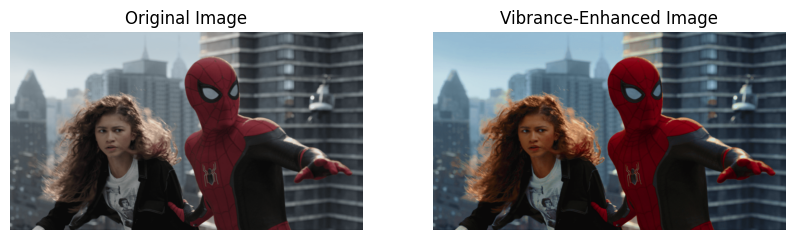

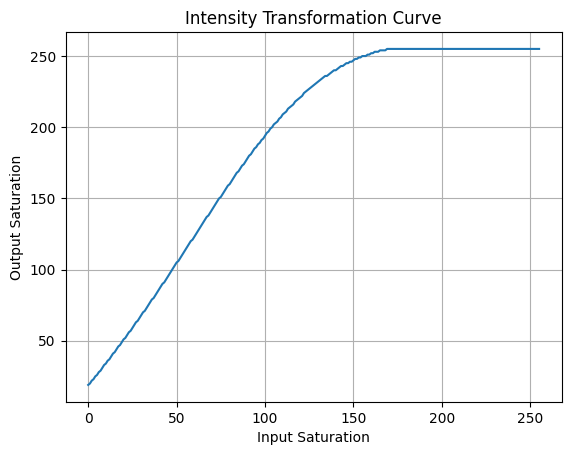

In [15]:
# Display the original and vibrance-enhanced images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Vibrance-Enhanced Image')
plt.axis('off')

plt.show()

# Plot the intensity transformation function
x_vals = np.arange(0, 256)
transformation_curve = intensity_transform(x_vals, a, sigma)

plt.plot(x_vals, transformation_curve)
plt.title('Intensity Transformation Curve')
plt.xlabel('Input Saturation')
plt.ylabel('Output Saturation')
plt.grid(True)
plt.show()


# 5.Histogram Equalization

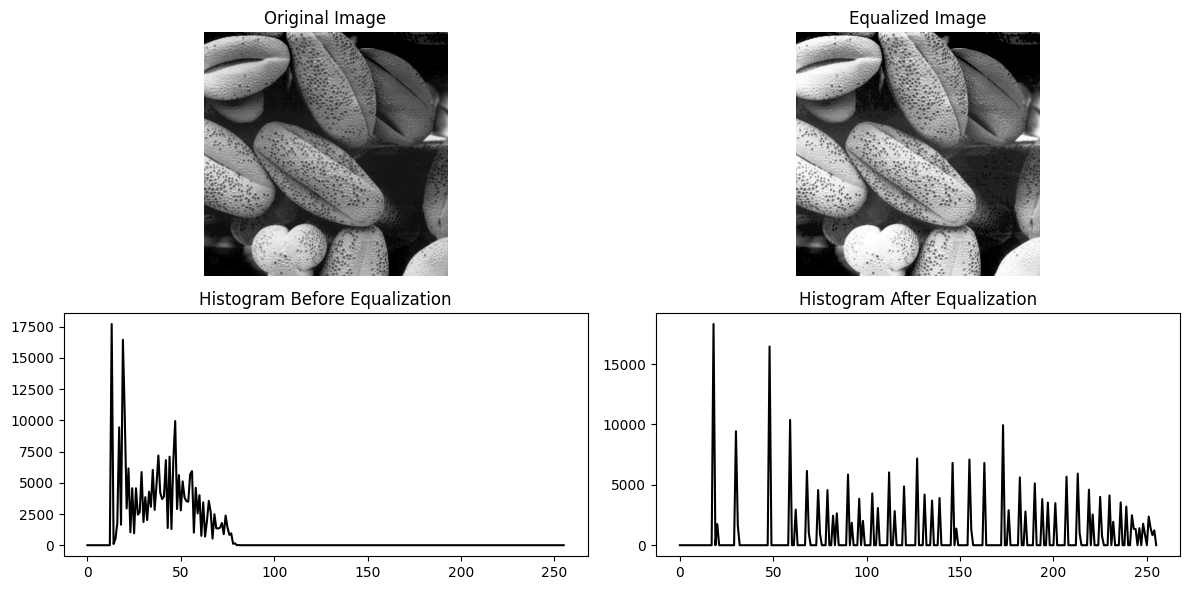

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform histogram equalization
def histogram_equalization(img):
    # Flatten the image into a 1D array of pixel values
    img_flattened = img.flatten()

    # Compute the histogram (256 bins for 8-bit grayscale image)
    hist, bins = np.histogram(img_flattened, bins=256, range=[0, 256])

    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize the CDF to range between 0 and 255
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')  # Convert to uint8

    # Use the CDF to map the original pixel values
    img_equalized = cdf_normalized[img_flattened]

    # Reshape back to the original image shape
    img_equalized = img_equalized.reshape(img.shape)

    return img_equalized, hist, cdf_normalized

image = cv2.imread('images/shells.tif', cv2.IMREAD_GRAYSCALE)

# Apply the histogram equalization
equalized_image, hist_before, cdf_normalized = histogram_equalization(image)

# Compute the histogram after equalization
hist_after, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

# Display the original and equalized images side by side
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Plot the histograms before and after equalization
plt.subplot(2, 2, 3)
plt.plot(hist_before, color='black')
plt.title('Histogram Before Equalization')

plt.subplot(2, 2, 4)
plt.plot(hist_after, color='black')
plt.title('Histogram After Equalization')

plt.tight_layout()
plt.show()


# 6. Histogram equalization to the foreground

## Convert the image to HSV color space

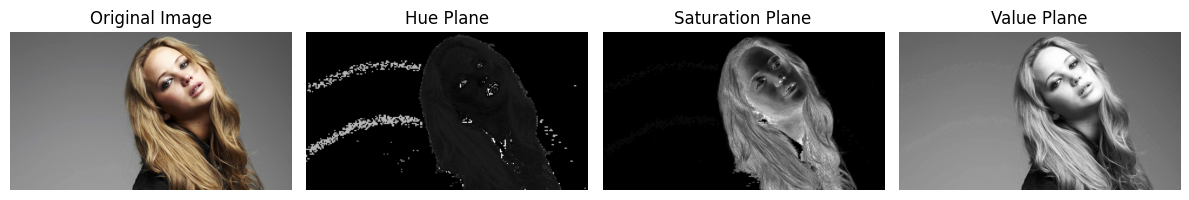

In [32]:
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('images/jeniffer.jpg')

# Convert the image from BGR to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value (HSV) planes
hue, saturation, value = cv.split(hsv_image)

# Display the original image and the three HSV planes in grayscale
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.tight_layout()
plt.show()


## Select the appropriate plane and compute the histogram.

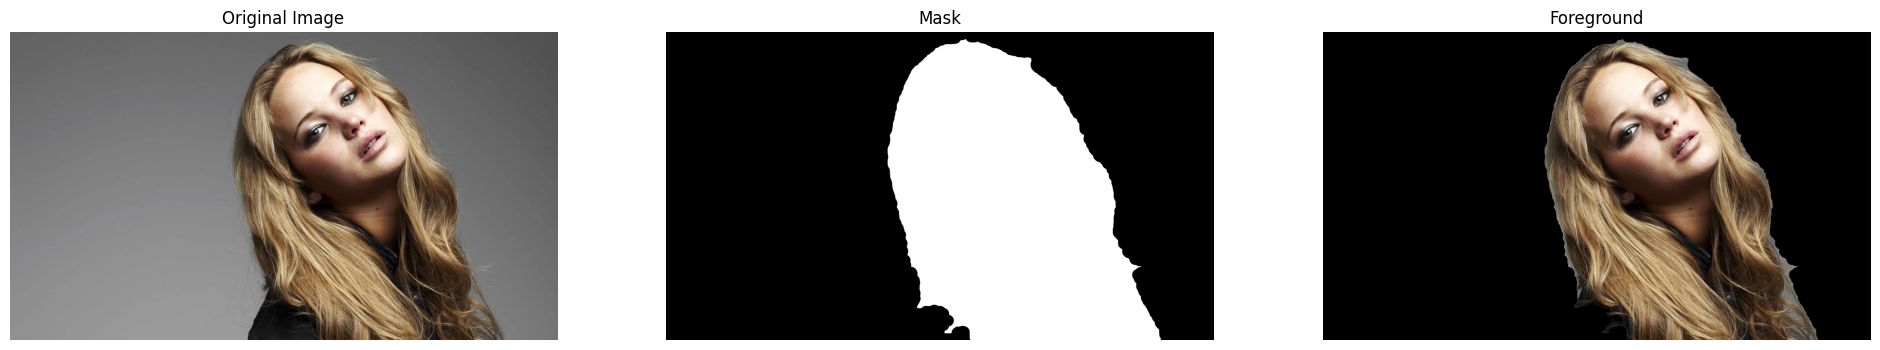

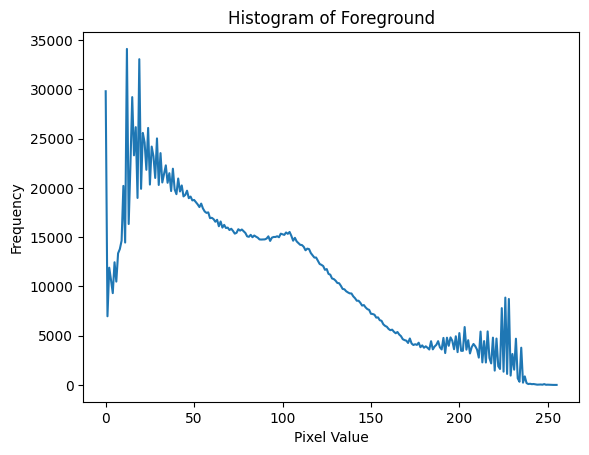

In [29]:
# Define the threshold values for saturation
saturation_min = 15
saturation_max = 255

# Create a binary mask based on saturation
foreground_mask = cv.inRange(saturation, saturation_min, saturation_max)

# Apply morphological operations to reduce noise
foreground_mask = cv.morphologyEx(foreground_mask, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(80, 80)))

# Obtain the foreground using cv.bitwise_and
foreground = cv.bitwise_and(image, image, mask=foreground_mask)

# Compute the histogram of the foreground
histogram = cv.calcHist([foreground], [0], foreground_mask, [256], [0, 256])

# Display the original image, mask, and foreground
plt.figure(figsize=(24, 8))

plt.subplot(131), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(foreground_mask, cmap='gray'), plt.title('Mask'), plt.axis('off')
plt.subplot(133), plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)), plt.title('Foreground'), plt.axis('off')
plt.show()

# Plot the histogram
plt.plot(histogram)
plt.title('Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## cumulative sum of the histogram

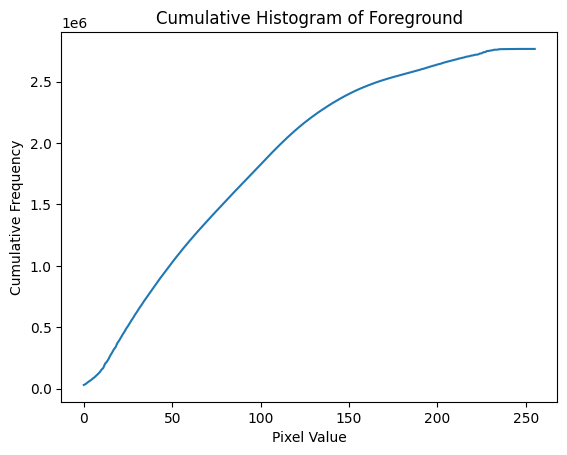

In [30]:
# cumulative sum of the histogram
cumulative_histogram = np.cumsum(histogram)

# Plot the cumulative histogram
plt.plot(cumulative_histogram)
plt.title('Cumulative Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.show()


## histogram-equalize the foreground

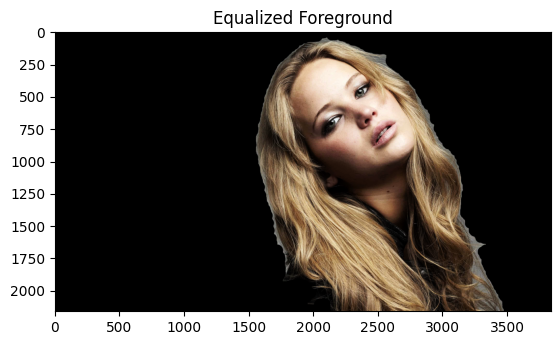

In [42]:
# Convert to hsv
hsv_foreground = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
value_foreground = hsv_foreground[:, :, 2]

# Apply histogram equalization
equalized_value_foreground = cv.equalizeHist(value_foreground)

hsv_foreground[:,:,2] = equalized_value_foreground

plt.imshow(cv.cvtColor(hsv_foreground, cv.COLOR_HSV2RGB)), plt.title('Equalized Foreground')
plt.show()

## Combine the background and the histogram equalized foreground

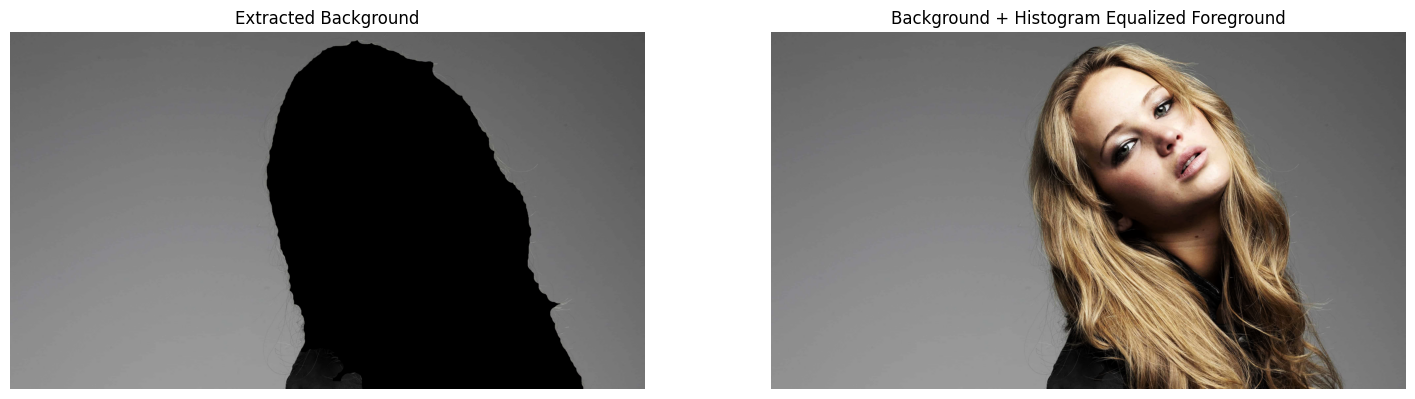

In [43]:
background_mask = cv.bitwise_not(foreground_mask)

# Obtain the background using cv.bitwise_and
extracted_background = cv.bitwise_and(image, image, mask=background_mask)

# Combine the background and histogram-equalized foreground
result = cv.add(extracted_background, cv.cvtColor(hsv_foreground, cv.COLOR_HSV2BGR))

plt.figure(figsize=(18, 6))

# Display the result
plt.subplot(121),plt.imshow(cv.cvtColor(extracted_background, cv.COLOR_BGR2RGB)),plt.title('Extracted Background'),plt.axis('off')
plt.subplot(122),plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB)),plt.title('Background + Histogram Equalized Foreground'),plt.axis('off')
plt.show()

## 7. Sobel Filtering

## filter2D for Sobel filter

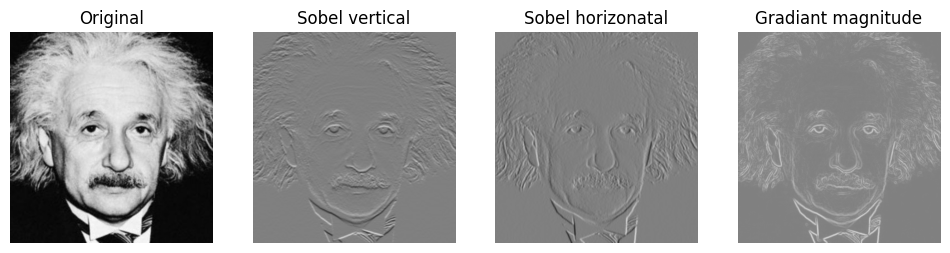

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

# Define the Sobel kernels
sobel_v = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype ='float')
sobel_h = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype ='float')

# Apply the Sobel filter for gradients
grad_y = cv.filter2D(img, -1, sobel_v)
grad_x = cv.filter2D(img, -1, sobel_h)
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

# Plot the results
fig,axes = plt.subplots(1,4, sharex=True, sharey=True, figsize=(12,3))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(grad_y, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel vertical')
axes[1].axis('off')

axes[2].imshow(grad_x, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel horizonatal')
axes[2].axis('off')

axes[3].imshow(grad_mag, cmap='gray', vmin=-1020, vmax=1020)
axes[3].set_title('Gradiant magnitude')
axes[3].axis('off')

# Show the figure
plt.show()

## Convolution for Sobel filter

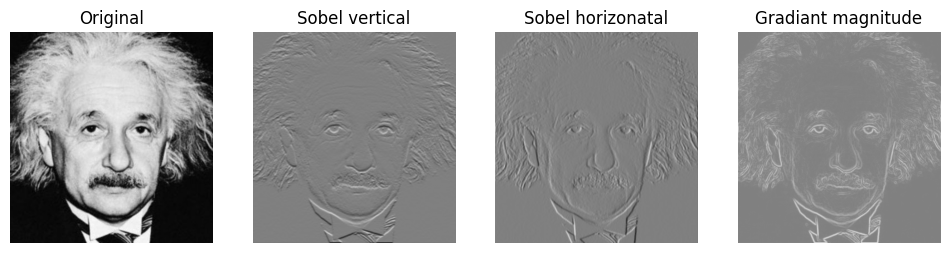

In [3]:
# Define the convolution function
def convolution2d(image, kernel):
    m, n = kernel.shape
    if m == n:
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y, x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m] * kernel)
    return new_image

# Read the image
img = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
rows, cols = img.shape[0], img.shape[1]

# Define Sobel kernels
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float')
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')

# Pad the image
padded = np.zeros((rows + 2, cols + 2))
for i in range(rows):
    for j in range(cols):
        padded[i + 1, j + 1] = img[i, j]

# Apply convolution
grad_x = convolution2d(padded, sobel_v)
grad_y = convolution2d(padded, sobel_h)
grad = np.sqrt(grad_x**2 + grad_y**2)

# Plot the results
fig,axes = plt.subplots(1,4, sharex=True, sharey=True, figsize=(12,3))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(grad_x, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel vertical')
axes[1].axis('off')

axes[2].imshow(grad_y, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel horizonatal')
axes[2].axis('off')

axes[3].imshow(grad, cmap='gray', vmin=-1020, vmax=1020)
axes[3].set_title('Gradiant magnitude')
axes[3].axis('off')

plt.show()

## Separable filters for sobel filter

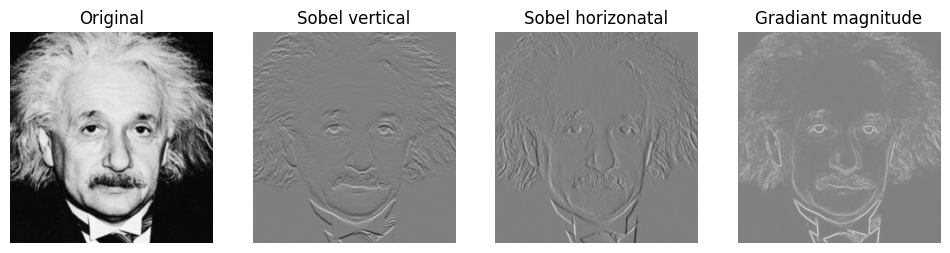

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

# Define the Sobel vertical and horizontal kernels
sobel_v_kernal = np.array([1,2,1], dtype=np.float32)
sobel_h_kernal = np.array([-1,0,1], dtype=np.float32)

# Apply the vertical and horizontal Sobel filters using separable filters
grad_y = cv.sepFilter2D(img, -1, sobel_v_kernal, sobel_h_kernal)
grad_x = cv.sepFilter2D(img, -1, sobel_h_kernal, sobel_v_kernal)

# Combine the gradients in both directions to get the overall gradient magnitude
grad = np.sqrt(grad_x**2 + grad_y**2)

# Plot the images   
fig,axes = plt.subplots(1,4, sharex=True, sharey=True, figsize=(12,3))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(grad_y, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel vertical')
axes[1].axis('off')

axes[2].imshow(grad_x, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel horizonatal')
axes[2].axis('off')

axes[3].imshow(grad_mag, cmap='gray', vmin=-1020, vmax=1020)
axes[3].set_title('Gradiant magnitude')
axes[3].axis('off')

plt.show()

# 8. Zoom images

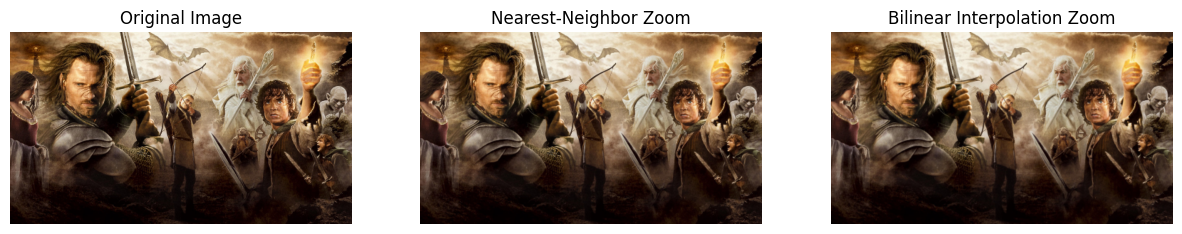

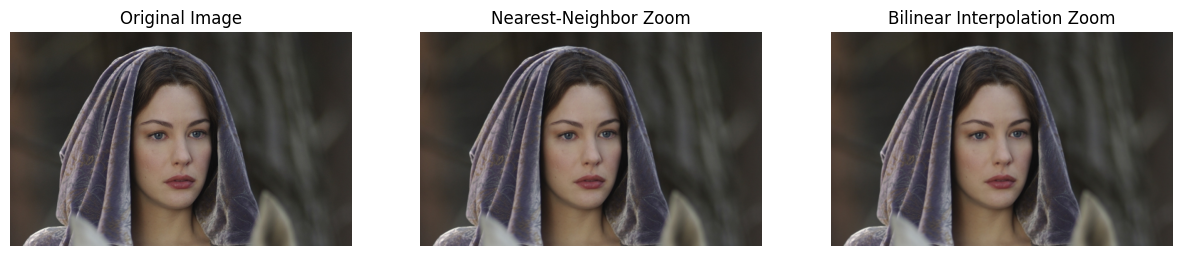

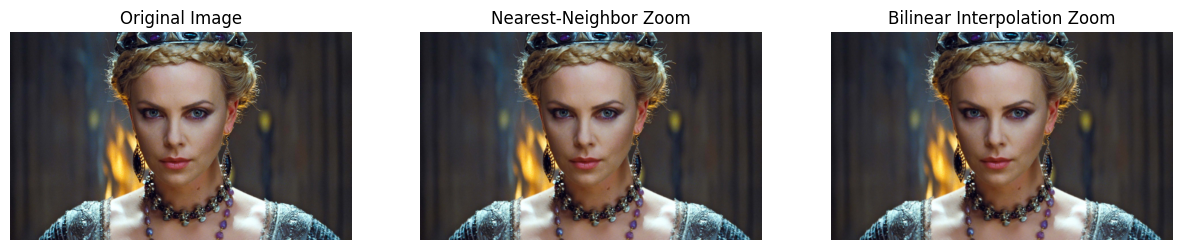

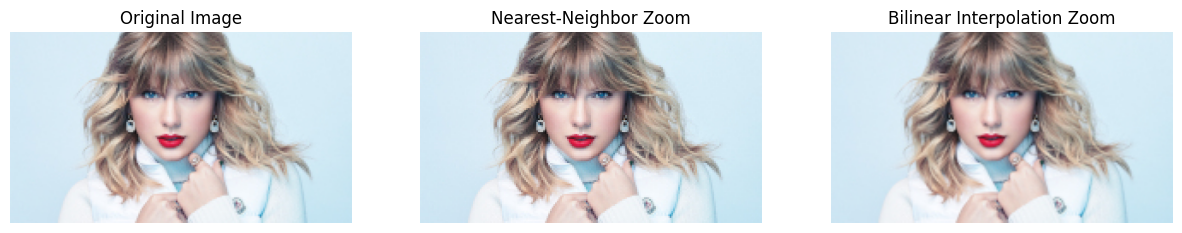

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to zoom the image using nearest-neighbor interpolation
def nearest_neighbor_zoom(image, zoom_factor):
    height, width = image.shape[:2]
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    
    # Create an empty zoomed image
    zoomed_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)
    
    for i in range(new_height):
        for j in range(new_width):
            # Map back to original image coordinates
            orig_x = int(i / zoom_factor)
            orig_y = int(j / zoom_factor)
            zoomed_image[i, j] = image[orig_x, orig_y]
    
    return zoomed_image

# Function to zoom the image using bilinear interpolation
def bilinear_zoom(image, zoom_factor):
    height, width = image.shape[:2]
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    
    # Create an empty zoomed image
    zoomed_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)
    
    for i in range(new_height):
        for j in range(new_width):
            # Map back to original image coordinates
            x = i / zoom_factor
            y = j / zoom_factor
            
            # Get the coordinates of the four nearest pixels
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, height - 1), min(y1 + 1, width - 1)
            
            # Calculate the fractional parts
            dx, dy = x - x1, y - y1
            
            # Perform bilinear interpolation
            zoomed_image[i, j] = (image[x1, y1] * (1 - dx) * (1 - dy) +
                                  image[x1, y2] * (1 - dx) * dy +
                                  image[x2, y1] * dx * (1 - dy) +
                                  image[x2, y2] * dx * dy)
    
    return zoomed_image


# Read the original images
img1 = cv.imread('images/im01small.png')
assert img1 is not None, "Image not found!"

img2 = cv.imread('images/im02small.png')
assert img2 is not None, "Image not found!"

img3 = cv.imread('images/im03small.png')
assert img3 is not None, "Image not found!"

img4 = cv.imread('images/im04small.jpg')
assert img4 is not None, "Image not found!"

for i in [img1, img2, img3, img4]:
    img = i
    
    # Set the zoom factor
    zoom_factor = 2.0  

    # Perform nearest-neighbor zoom
    zoomed_nearest = nearest_neighbor_zoom(img, zoom_factor)

    # Perform bilinear interpolation zoom
    zoomed_bilinear = bilinear_zoom(img, zoom_factor)

    # Display the original and zoomed images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(cv.cvtColor(zoomed_nearest, cv.COLOR_BGR2RGB))
    axs[1].set_title('Nearest-Neighbor Zoom')
    axs[1].axis('off')

    axs[2].imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
    axs[2].set_title('Bilinear Interpolation Zoom')
    axs[2].axis('off')

    plt.show()




# 9.Image Segmentation

# grabCut

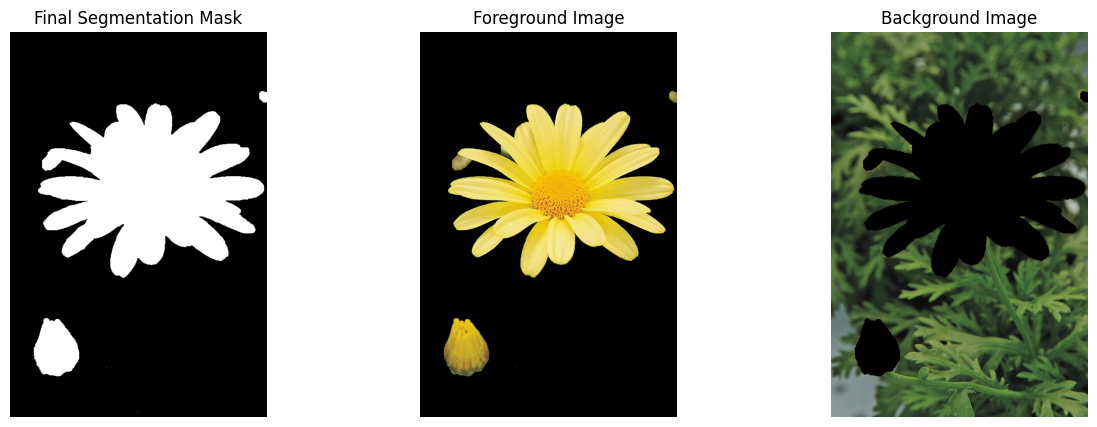

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/daisy.jpg')
assert img is not None, "Image not found."

# Initialize mask and background/foreground models
mask = np.zeros(img.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle around the object (foreground) for GrabCut
rect = (10, 10, img.shape[1] - 10, img.shape[0] - 10)  # Adjust rectangle as needed

# Apply GrabCut algorithm
cv.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to get a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')  # Background is 0, Foreground is 1

# Create the foreground and background images
foreground = img * mask2[:, :, np.newaxis]  # Apply the mask to the original image
background = img * (1 - mask2[:, :, np.newaxis])  # Invert the mask for background

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(mask2, cmap='gray')
ax[0].set_title('Final Segmentation Mask')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground Image')
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[2].set_title('Background Image')
ax[2].axis('off')

plt.show()


## Enhanced image with Blurred background

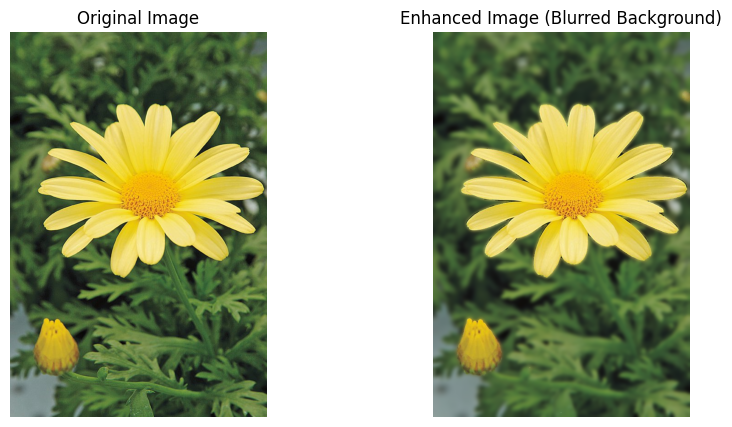

In [25]:
# Create the foreground image
foreground = img * mask2[:, :, np.newaxis]  # Apply the mask to the original image

# Create a blurred version of the image
blurred_background = cv.GaussianBlur(img, (21, 21), 0)  # Adjust the kernel size for more/less blur

# Combine the foreground with the blurred background
enhanced_image = blurred_background * (1 - mask2[:, :, np.newaxis]) + foreground

# Display the original and enhanced images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(enhanced_image.astype(np.uint8), cv.COLOR_BGR2RGB))  # Ensure the enhanced image is uint8
ax[1].set_title('Enhanced Image (Blurred Background)')
ax[1].axis('off')

plt.show()

## Why is the background just beyond the edge of the flower quite dark in the enhanced image?

### Imperfect Masking Near Edges: GrabCut's binary segmentation creates a hard distinction between foreground and background. Near the edges of the flower, the algorithm may have trouble cleanly separating the flower from the background, especially where there are smooth transitions in color or texture.

### Blurring and Mask Transition: Blurring the background affects the overall brightness and sharpness of the background. When this blurred background is combined with the foreground using the mask, any sharp transition at the edge of the mask can create visible artifacts such as dark halos or sharp edges.